In [1]:
import matplotlib.pyplot as plt
from src.Field.perturbation_field import PerturbationField
from src.ReadData.read_radius import get_r_grid

In [2]:
r_grid = get_r_grid()
pert_field = PerturbationField()
rans_field = pert_field.rans_field
rans_values = rans_field.values



(13869, 69) (536, 69)


In [3]:
# Extract specific fields for comparison
x = rans_values['x']
r = rans_values['r']


ux = rans_values['ux']
ux_interp = rans_field.interpolated_values['ux']



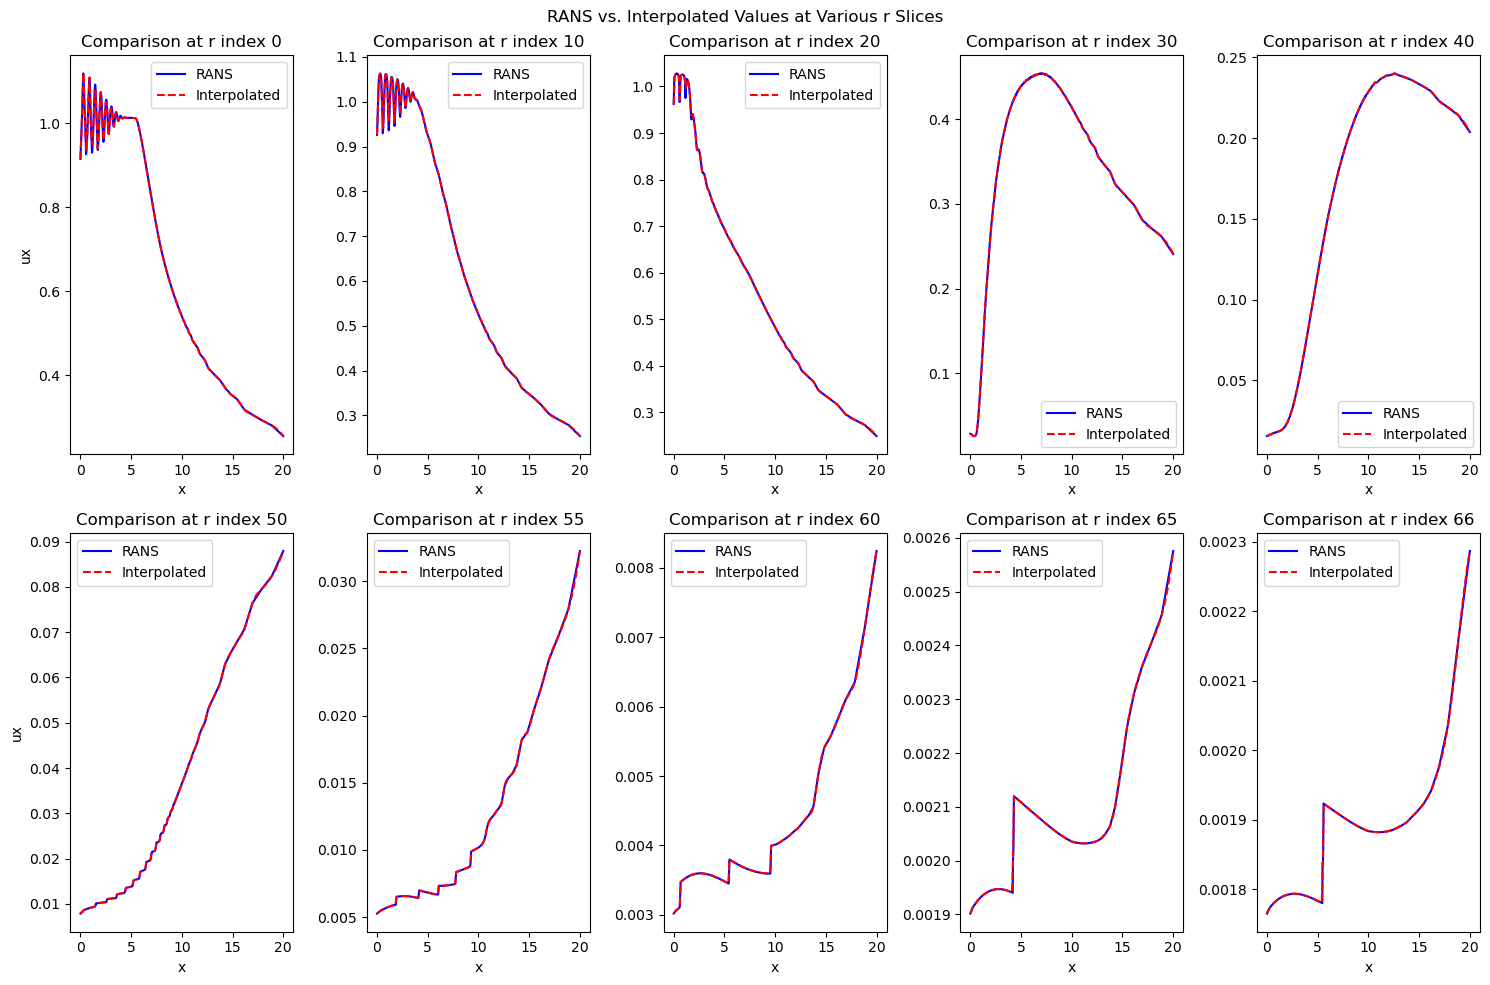

In [4]:
# Define r indices for comparison
r_indices = [0, 10, 20, 30, 40, 50, 55, 60, 65, 66]  # Adjust indices as needed for specific r values
num_plots = len(r_indices)

# Set up the grid dimensions for subplots
rows, cols = 2, (num_plots + 1) // 2  # 2 rows and enough columns to fit all plots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.suptitle('RANS vs. Interpolated Values at Various r Slices')

# Flatten the axes for easy indexing
axes = axes.flatten()

# Loop over r indices and plot the comparisons
for idx, r_idx in enumerate(r_indices):
    ax = axes[idx]
    ax.plot(x.iloc[:, r_idx], ux.iloc[:, r_idx], label='RANS', color='blue')
    ax.plot(pert_field.x_grid[:][r_idx], ux_interp[:][r_idx], label='Interpolated', linestyle='--', color='red')

    ax.set_title(f'Comparison at r index {r_idx}')
    ax.set_xlabel('x')
    if idx % cols == 0:
        ax.set_ylabel('ux')
    ax.legend()

# Hide any unused subplots
for ax in axes[num_plots:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()